<a href="https://colab.research.google.com/github/ozydziak/uczenie-maszynowe/blob/cwiczenia_z_python/Regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np
import pandas as pd
sklearn.__version__

'1.0.2'

In [ ]:
data = {
    'size': ['XL', 'L', 'M', 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', 'male', 'female', 'female'],
    'price': [199.0, 89.0, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']
}

df_row =pd.DataFrame(data)

df =df_row.copy()

df.info()

from sklearn.preprocessing import LabelEncoder

scale = LabelEncoder()

df['bought'] = scale.fit_transform(df['bought'])

df

pd.get_dummies(df, drop_first = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   5 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      int64  
 5   bought  5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,199.0,500,1,0,1,0,1,0
1,89.0,450,0,0,0,1,0,1
2,99.0,300,1,1,0,0,0,1
3,129.0,380,0,0,0,1,0,0
4,79.0,410,1,1,0,0,1,0


In [ ]:
data1 = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}


df_row1 = pd.DataFrame(data1)

df = df_row1.copy()


df

from sklearn.impute import SimpleImputer

#imputer= SimpleImputer(missing_values= np.nan, strategy="median")
#imputer.fit(df[['weight', 'price']])

#imputerCategory = SimpleImputer(missing_values=np.nan, strategy="most_frequent", fill_value="brak")
#imputerCategory.fit(df[['size', 'gender']])
#df[['weight', 'price']] =imputer.transform(df[['weight', 'price']])
#df[['size' , 'gender']] =imputerCategory.transform(df[['size','gender']])


procent = df.isnull().sum() / len(df)

procent

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

In [ ]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df.isnull().sum()


df.dropna(inplace=True)
df['price'].interpolate()
df = df.reset_index()
import plotly.express as px


px.line(df, 'index' , 'price' , title='szereg czasowy', width=600, height=400)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


(112,)

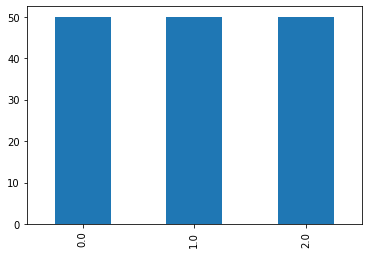

In [ ]:
from dataclasses import dataclass
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

np.random.seed(42)

from sklearn.datasets import load_iris

row_data = load_iris()

da = row_data.copy()

data = da['data']

target = da['target']

merge_data = np.c_[data, target]

merge_data


df =pd.DataFrame(merge_data, columns = list(row_data.feature_names)+ ['target'])
df.head()

df.info()

df.isnull().sum()

df.describe().T.apply(lambda x: round(x,2))

df.target.value_counts().plot(kind="bar")

data = df.copy()

target = data.pop('target')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,test_size = 0.25,random_state=42, stratify=target)

y_train.shape



1.0    0.626761
0.0    0.373239
Name: target, dtype: float64
1.0    0.627635
0.0    0.372365
Name: target, dtype: float64


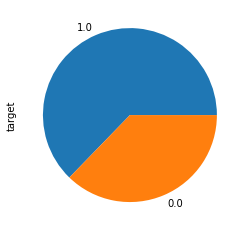

In [ ]:
from sklearn.datasets import load_breast_cancer


row_data = load_breast_cancer()
row_copy = row_data.copy()



dane = row_copy['data']

target=row_copy['target']

merge_ = np.c_[dane, target]


df = pd.DataFrame(merge_, columns = list(row_data.feature_names)+['target'])

df.target.value_counts().plot(kind="pie")


data = df.copy()

target = data.pop('target')

target.head()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state= 42 ,train_size=0.25, stratify=target)
print(y_train.value_counts() / len(y_train))

print(y_test.value_counts() / len(y_test) )

# Nowa sekcja

250.0 2750.0
(100, 1) (100,)
49.82930934700912 3.4953459615809175


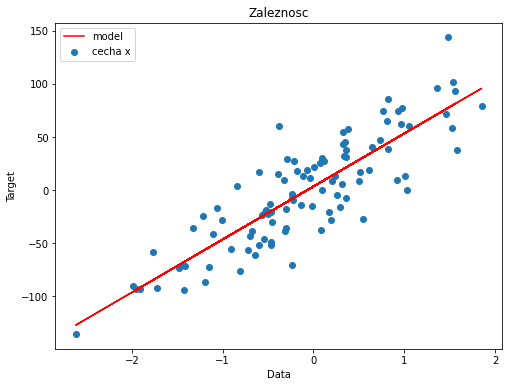

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

regression = LinearRegression()


X1 = np.array([1, 2, 3, 4, 5, 6])
X1=  X1.reshape(6,1)
Y = np.array([3000, 3250, 3500, 3750, 4000, 4250])
m = len(X1)

regression.fit(X1, Y)

print(regression.coef_ [0], regression.intercept_)


from sklearn.datasets import make_regression


data, target = make_regression(n_samples = 100, n_features=1,n_targets=1, noise=30.0, random_state=42)

print(data.shape ,target.shape)




regresjaRandom = LinearRegression()
regresjaRandom.fit(data, target)

regresjaRandom.score(data, target)

y_pred= regresjaRandom.predict(data)

plt.figure(figsize=(8,6))

plt.title('Zaleznosc')
plt.xlabel("Data")
plt.ylabel("Target")
plt.scatter(data, target, label='cecha x')
plt.plot(data, y_pred, color='red', label='model')
plt.legend()
plt.plot

print(regresjaRandom.coef_[0], regresjaRandom.intercept_)



In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

X_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.8,random_state=42)

regression = LinearRegression()
regression.fit(X_train, y_train)

regression.score(X_train, y_train)

regression.score(x_test,y_test)

y_pred= regression.predict(x_test)

predictions = pd.DataFrame(data= {'y_true' : y_test, 'y_pred': y_pred})

predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,30.876983,25.296865,5.580119
1,1.850537,5.740809,-3.890272
2,30.604981,31.292315,-0.687334
3,-9.092543,-16.601035,7.508492
4,-36.311708,-10.936951,-25.374757


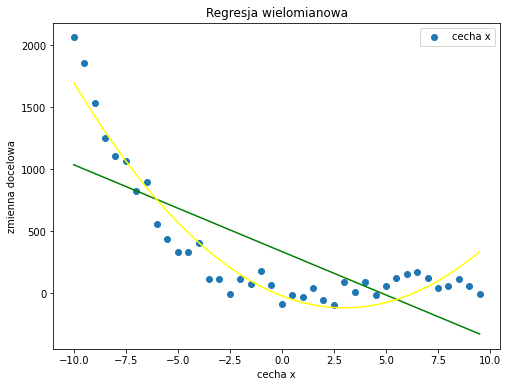

0.9828239355236628

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)







reg = LinearRegression()
reg.fit(X,y)

reg.score(X,y)
y_pred_lin= reg.predict(X)

y_pred_lin



from sklearn.metrics import r2_score

r2_score(y, y_pred_lin)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)
X_poly


regresja_poly_2 = LinearRegression()
regresja_poly_2.fit(X_poly,y)

regresja_poly_2.score(X_poly,y)

y_pred_ply_2 = regresja_poly_2.predict(X_poly)
r2_score(y, y_pred_ply_2)

poly_3 = PolynomialFeatures(degree=3)
poly_x_3 = poly_3.fit_transform(X)

regresja_poly_3 = LinearRegression()
regresja_poly_3.fit(poly_x_3, y)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, color='green')
plt.plot(X, y_pred_ply_2, color='yellow')
plt.legend()
plt.show()


regresja_poly_3.score(poly_x_3,y)